In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score


In [3]:
df01=pd.read_csv('./sorhtbiomtraining.csv')
df01.head()

,date,genotype,plot_id,mdexgrn,GT_Spad,GT_StoverN,GT_StoverDigestibility,GT_Spad.1,ccperexgr,GT_StoverN.1,GT_StoverDigestibility.1,drone_height,GT_height,GT_cepto,GT_Biom
0,03-Dec,5,1001,0.162304,28.6,2.30,61.10,28.6,0.113033,2.30,61.10,0.239349,38.6,0.32,131.4
1,03-Dec,4,1002,0.183857,23.8,2.28,61.20,23.8,0.136884,2.28,61.20,0.297211,42.1,0.48,129.0
2,03-Dec,6,1003,0.195432,24.9,1.94,60.48,24.9,0.172817,1.94,60.48,0.421204,46.1,0.69,236.2
3,03-Dec,2,1004,0.153846,30.5,2.62,61.27,30.5,0.080808,2.62,61.27,0.368591,44.9,0.24,132.7
4,03-Dec,3,1005,0.182320,26.5,2.22,60.43,26.5,0.170247,2.22,60.43,0.448669,53.8,0.75,303.3


In [4]:
X_train = df01.drop(['date','plot_id','genotype','GT_Spad','GT_StoverN','GT_Biom','GT_StoverDigestibility','GT_Spad.1','GT_StoverN.1','GT_StoverDigestibility.1','GT_height','GT_cepto'], axis=1)
y_train = df01['GT_Biom']

In [5]:
X_train.head()

,mdexgrn,ccperexgr,drone_height
0,0.162304,0.113033,0.239349
1,0.183857,0.136884,0.297211
2,0.195432,0.172817,0.421204
3,0.153846,0.080808,0.368591
4,0.182320,0.170247,0.448669


In [6]:
df= pd.read_csv("./sorhtbiomtesting_8718.csv")
df.head()

,date,genotype,plot_id,drone_height,ccperexgr,mdexgrn,GT_Biom
0,08-Dec,5,1001,0.428256,0.090688,0.275660,131.4
1,08-Dec,4,1002,0.558379,0.117576,0.284091,129.0
2,08-Dec,6,1003,0.568604,0.118117,0.287273,236.2
3,08-Dec,2,1004,0.560669,0.056038,0.276119,132.7
4,08-Dec,3,1005,0.688219,0.131442,0.289063,303.3


In [7]:
X_test= df[['mdexgrn','ccperexgr','drone_height']]
y_test = df['GT_Biom']

In [8]:
X_test.head()

,mdexgrn,ccperexgr,drone_height
0,0.275660,0.090688,0.428256
1,0.284091,0.117576,0.558379
2,0.287273,0.118117,0.568604
3,0.276119,0.056038,0.560669
4,0.289063,0.131442,0.688219


In [9]:
from sklearn.ensemble import RandomForestRegressor


In [10]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    #"criterion":['mse','mae']
}
clf = RandomForestRegressor(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'max_depth': 15, 'n_estimators': 10}
MSE:16411.845830776514


In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":[0.01,0.1,1]
}
clf = SVR(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)
print("MSE:"+ str(-grid.best_score_))

{'C': 1, 'epsilon': 1, 'kernel': 'poly'}
MSE:13663.507070863503


In [12]:
# Support vector Regression----

Regr= SVR(kernel = 'poly', C= 1,epsilon= 1)
Regr.fit(X_train, y_train)

SVR(C=1, epsilon=1, kernel='poly')

In [13]:
y_pred = Regr.predict(X_train)

In [14]:
y_pred

array([ 123.66381505,  141.13750737,  194.43950148,  152.79300589,
        204.75235477,  237.52131508,  181.90909027,  158.99824419,
        125.60000055,  112.23298038,  165.78447686,  126.47480928,
        145.68301154,  185.66057241,  162.02056874,  157.96733473,
        170.4209869 ,  127.4129667 ,  141.67918447,  152.01517212,
        153.83636126,  169.93602296,  181.63303321,  132.26147209,
        178.13443138,  157.91686014,  127.6946763 ,  138.30824863,
        132.04074339,  207.13349329,  162.82451107,  159.22916547,
        151.08486808,  144.66985739,  162.15060369,  103.45500592,
        104.59636449,  105.56939084,  106.43353649,  113.81765283,
        121.7775288 ,  105.83500915,  102.9958432 ,  104.57451946,
        105.6790789 ,  111.39060528,  106.59271065,  103.6871091 ,
        127.33903731,  112.45031663,  456.88203485,  794.58290872,
        703.76209461,  695.08522058, 1072.81216029,  745.99995284,
       1380.45386998,  851.89994961,  729.57239155,  413.33669

In [15]:
Regr.score(X_train,y_train)

0.8791686439107119

In [16]:
from sklearn import metrics

In [17]:
# Calculating MAE-----of the model---

meanAbErr = metrics.mean_absolute_error(y_train, y_pred)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 70.88642132699279


In [18]:
print('R-2 score: {:.2f}'.format(Regr.score(X_train,y_train)))

R-2 score: 0.88


In [19]:
meanSqErr = metrics.mean_squared_error(y_train, y_pred)

print('Mean Square Error:', meanSqErr)

Mean Square Error: 10155.442681651995


In [20]:
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print('RMSE using Multiple Regression:',rootMeanSqErr)

RMSE using Multiple Regression: 100.77421635345023


In [21]:
from scipy import stats
r , p= stats.pearsonr(y_train,y_pred)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.9389906712186287
-----------------
The P-Value is :  8.032372532822942e-46


## For test dataset-

In [22]:
svrReg_new = SVR(kernel = 'poly', C= 1,epsilon= 1)
svrReg_new.fit(X_test,y_test)

SVR(C=1, epsilon=1, kernel='poly')

In [23]:
y_pred_test = svrReg_new.predict(X_test)

In [24]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', meanAbErr)

mse = np.mean((y_pred_test - y_test)**2)
print('Mean squared error :',mse)

# Calculate RMSE

rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE using Multiple Regression:',rootMeanSqErr)
 
## calculating score 
 
score = svrReg_new.score(X_test,y_test) 
 
print('R-2 Score:',score)

Mean Absolute Error: 467.3255656226345
Mean squared error : 333500.77405786846
RMSE using Multiple Regression: 577.4952589050998
R-2 Score: 0.4696392635781479


In [25]:
from scipy import stats
r , p= stats.pearsonr(y_test,y_pred_test)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.6879757488439147
-----------------
The P-Value is :  2.2660325231024596e-21


## Visualizing regression model

[Text(0.5, 1.0, 'SVR_Regression plot of our model')]

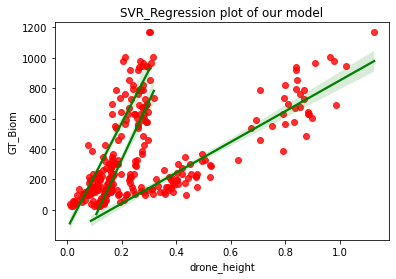

In [26]:
import seaborn as sns

sns.regplot(x=X_train['mdexgrn'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='SVR_Regression plot of our model') 
sns.regplot(x=X_train['ccperexgr'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='SVR_Regression plot of our model') 
sns.regplot(x=X_train['drone_height'],y=y_train,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='SVR_Regression plot of our model') 


[Text(0.5, 1.0, 'Prediction Visualization')]

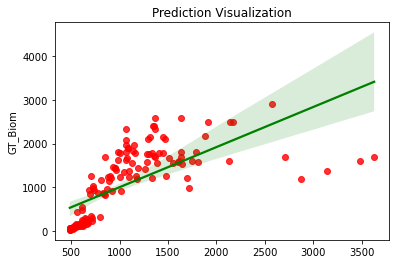

In [27]:



import seaborn as sns

sns.regplot(x=y_pred_test,y=y_test,scatter_kws={"color": "red"}, line_kws={"color": "green"}).set(title='Prediction Visualization')

# Evaluating the model accuracy with LASSO.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [29]:
lasso_regressor = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_model = GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_model.fit(X_train,y_train)

C:\Users\Ashutosh Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324165.0347176435, tolerance: 748.7785372207793
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashutosh Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225311.00753554728, tolerance: 488.59889717948727
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashutosh Yadav\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290805.43544396455, tolerance: 734.7604733846154
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [30]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 1}
-12112.800577854077


In [31]:

lasso = Lasso(alpha=1)

In [32]:
lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [33]:
y_pred = lasso.predict(X_train)

In [34]:
y_pred

array([ 95.61122162, 155.15177142, 279.5591634 , 210.66871245,
       304.90802441, 358.33394869, 260.98650625, 221.09439026,
       115.03806306,  37.75081579, 239.16352989, 124.53765782,
       185.16848012, 280.01504346, 232.78374953, 227.58543562,
       250.08499546, 127.32546367, 174.59677993, 209.06603446,
       207.02429144, 249.7934406 , 272.09183953, 153.14737188,
       260.78797403, 226.23722074, 120.37113033, 161.12184046,
       149.70630482, 319.37729947, 233.03945951, 220.96339944,
       202.16697009, 186.38975668, 229.05024516, -58.73296843,
       -36.95145557, -21.00449232, -13.93665876,  54.80415852,
        96.71578887, -17.44024922, -70.34059593, -37.62906016,
       -19.57374955,  38.84333207, -10.24900353, -58.18492701,
       129.12873669,  37.58172898, 542.82279169, 745.97290244,
       691.07076037, 718.36400805, 872.32158048, 724.36555311,
       971.50576726, 761.31915744, 709.1666394 , 517.60253491,
       680.32172617, 648.12701694, 832.59644114, 730.78

In [35]:
from sklearn import metrics

In [36]:
# Calculating MAE-----of the model---

meanAbErr = metrics.mean_absolute_error(y_train, y_pred)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 81.44330037884372


In [37]:
meanSqErr = metrics.mean_squared_error(y_train, y_pred)

print('Mean Square Error:', meanSqErr)

Mean Square Error: 10620.410970593353


In [38]:
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
print('RMSE using Multiple Regression:',rootMeanSqErr)

RMSE using Multiple Regression: 103.05537817403493


In [39]:
print('R-2 Score: {:.2f}'.format(lasso.score(X_train,y_train)))

R-2 Score: 0.87


In [40]:
from scipy import stats
r , p= stats.pearsonr(y_train,y_pred)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.9348039737197223
-----------------
The P-Value is :  1.703454294491131e-44


In [41]:
lasso.coef_

array([ -0.        , 209.76890327, 942.55143704])

## For test dataset-

In [42]:
lasso_new = Lasso(alpha=1)

In [43]:
lasso_new.fit(X_test, y_test)

Lasso(alpha=1)

In [44]:
y_pred_test= lasso_new.predict(X_test)

In [45]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', meanAbErr)

Mean Absolute Error: 339.00380198497754


In [46]:
meanSqErr = metrics.mean_squared_error(y_test, y_pred_test)

print('Mean Square Error:', meanSqErr)

Mean Square Error: 180888.0997016741


In [47]:
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE using Multiple Regression:',rootMeanSqErr)

RMSE using Multiple Regression: 425.3094164272337


In [48]:
print('R-2 Score: {:.2f}'.format(lasso_new.score(X_test,y_test)))

R-2 Score: 0.71


In [49]:
 from scipy import stats
r , p= stats.pearsonr(y_test,y_pred_test)
print('The R -value is : ', r)
print('-----------------')
print('The P-Value is : ',p)

The R -value is :  0.8440072222072773
-----------------
The P-Value is :  5.612127915086229e-40
